# 1.1 Get the Data

## 1.1.1 File Download

In [1]:
import os, sys
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("ml_tutorial_5_data_train.csv")
df_train.head()

,x1,x2,class
0,-0.136282,3.244889,0
1,-5.305888,5.629232,0
2,-4.147647,-0.226319,1
3,-2.170794,3.946986,0
4,-5.555908,1.155239,0


In [3]:
df_test = pd.read_csv("ml_tutorial_5_data_test.csv")
df_test.head()

,x1,x2,class
0,3.967433,5.580323,1
1,-5.324361,-4.574185,1
2,5.635016,3.301594,1
3,2.369043,-2.431812,0
4,3.607040,-3.598197,0


## 1.1.2 Split Signal vs Background

In [5]:
# Variables of interest
XNAME = 'x1'; XLABEL = r'$x_1$'
YNAME = 'x2'; YLABEL = r'$x_2$'
RANGE = (-6, 6); STEP = 0.1

inputs = [XNAME, YNAME]


# Split training data into signal and background
rows = df_train["class"] == 1
columns = inputs
sig = df_train.loc[rows, ["x1", "x2"]]
bkg = df_train.loc[~rows, ["x1", "x2"]]

In [6]:
import numpy as np
import pandas as pd
import random
import math
np.random.seed(42)

import matplotlib.pyplot as plt
FONTSIZE = 16
params = {
         'figure.figsize' : (6,6),
         'axes.labelsize' : FONTSIZE,
         'axes.titlesize' : FONTSIZE+2,
         'legend.fontsize': FONTSIZE,
         'xtick.labelsize': FONTSIZE,
         'ytick.labelsize': FONTSIZE,
         'xtick.color'    : 'black',
         'ytick.color'    : 'black',
         'axes.facecolor' : 'white',
         'axes.edgecolor' : 'black',
         'axes.titlepad'  :  20,
         'axes.labelpad'  :  10}
plt.rcParams.update(params)

XNAME = 'x1'; XLABEL = r'$x_1$'
YNAME = 'x2'; YLABEL = r'$x_2$'
RANGE = (-6, 6); STEP = 0.1

def predict(output_node, boundary_value):
    output_node = output_node.reshape(-1, 1, 1)
    predictions = (output_node > boundary_value).astype(int)
    return predictions

def plot_cost_vs_iter(train_costs, test_costs, title="Cost evolution"):

    fig, ax = plt.subplots(figsize=(8, 6))
    iters = np.arange(1,len(train_costs)+1)
    ax.plot(iters, train_costs, color='red', lw=1, label='Training set')
    ax.plot(iters, test_costs, color='blue', lw=1, label='Testing set')
    ax.set_xlabel("Number of iterations"); ax.set_xlim(1, iters[-1])
    ax.set_ylabel("Cost")
    ax.legend(loc="upper right", frameon=False)
    ax.set_title(title)
    plt.show()

def get_decision_surface(weights, biases, boundary=0.5, range=RANGE, step=STEP):

    # Create a grid of points spanning the parameter space:
    x1v, x2v = np.meshgrid(np.arange(range[0], range[1]+step, step),
                           np.arange(range[0], range[1]+step, step)
    )

    # Stack it so that it is shaped like X_train: (m,2)
    X_grid = np.c_[x1v.ravel(), x2v.ravel()].reshape(-1,2)

    # Feedforward on all grid points and get binary predictions:
    output = feedforward(X_grid, weights, biases)[-1] # getting only output node
    Ypred_grid = predict(output, boundary)

    return (x1v, x2v, Ypred_grid.reshape(x1v.shape))


def plot_scatter(sig, bkg, ds=None, 
                 xname=XNAME, xlabel=XLABEL, 
                 yname=YNAME, ylabel=YLABEL, 
                 range=RANGE, step=STEP, title="Scatter plot"):

    fig, ax = plt.subplots()

    # Decision surface
    if ds:
        (xx, yy, Z) = ds # unpack contour data
        cs = plt.contourf(xx, yy, Z, levels=[0,0.5,1], colors=['orange','dodgerblue'], alpha=0.3)

    # Scatter signal and background:
    ax.scatter(sig[xname], sig[yname], marker='o', s=10, c='dodgerblue', alpha=1, label='Positive class')
    ax.scatter(bkg[xname], bkg[yname], marker='o', s=10, c='orange',     alpha=1, label='Negative class')

    # Axes, legend and plot:
    ax.set_xlim(range); ax.set_xlabel(xlabel)
    ax.set_ylim(range); ax.set_ylabel(ylabel)

    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False) 
    ax.set_title(title)
    plt.show()

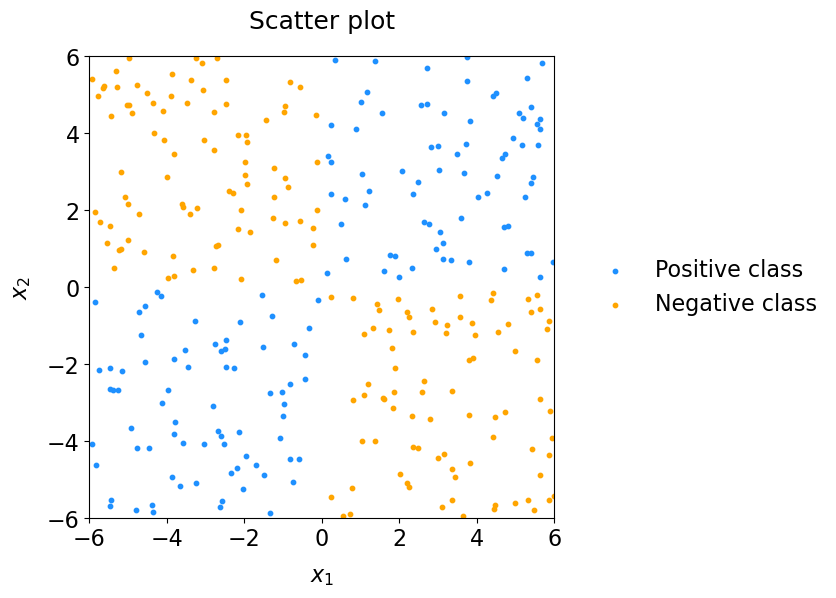

In [7]:
plt.show(plot_scatter(sig, bkg))

## 1.1.3 Dataframe to NumPy

In [9]:
inputs = ['x1', 'x2']
X_train = df_train[inputs].values
y_train = df_train['class'].values

X_test = df_test[inputs].values
y_test = df_test['class'].values

print("Shape of  X_train", X_train.shape)
print("Shape of  y_train", y_train.shape)

print("\nShape of  X_train", X_test.shape)
print("Shape of  y_train", y_test.shape)

Shape of  X_train (320, 2)
Shape of  y_train (320,)

Shape of  X_train (80, 2)
Shape of  y_train (80,)


# 1.2 Functions

## 1.2.1 Weighted Sum

In [12]:
def z(weights, inputs, bias):
    """
    Computes the weighted sum of inputs for a neuron by adding up all the inputs after multiply each one by its
    corresponding weight, then add the bias at the end.
    This gives the total input to a neuron before activation.
    
    Parameters:
    ----------
    Weights (list or array): The weights associatedd with each input.
    Inputs (list or array): The input values to the neuron.
    Bias (float): The bias term added to the weighted sum
    
    Return:
    -------
    The result of the weighted sum plus bias
    """
    
    total = 0
    w = len(weights)
    for i in range(w):
        total += weights[i] * inputs[i]
    return total + bias

In [13]:
#Example
weights = [0.25, -0.1, 0.4]
inputs = [2.0, 1.0, -3.0]
bias = 0.01

output = z(weights, inputs, bias)
print("Weighted sum is", output)

Weighted sum is -0.7900000000000001


## 1.2.2 Activation Functions and Derivatives

In [15]:
def tanh(z):
    return np.tanh(z) #The hyperbolic tangent activation function

def sigmoid(z):
    return 1/(1 + np.exp(-z)) # Sigmoid activation function

def sigmoid_prime(z):
    sp = sigmoid(z)
    return sp * (1 - sp) #Sigmoid prime activation function. Used during backpropagation to calc. gradients

def tanh_prime(z):
    tp = tanh(z)
    return 1 - tp**2 # Derivative of the tanh function. Used during backpropagation to calc. gradients

## 1.2.3: Cross-entropy cost function


In [17]:
def cross_entropy_cost(y_pred, y_true):
    """
    Compute the cross entropy cost between predicted probabilities and true classes.
    
    Parameters
    ----------
    y_true :Actual class (0 or 1)
    y_pred : Predicted probability (between 0 or 1).

    Input features, already augmented with a column of ones for bias.
    Returns
    -------
    Cross entropy loss value
    """
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)

In [18]:
# Example
y_pred = np.array([0.7, 0.3, 0.5])
y_true = np.array([1, 0, 1])

loss = cross_entropy_cost(y_pred, y_true)
print("Cross entropy loss is ",loss)

Cross entropy loss is  0.46883235614580343


## 1.2.4 Derivative of the Loss

In [20]:
def L_prime(y_pred, y_true):
    """
    Derivative of binary cross entropy loss with respect to y_pred.
    
    Parameters
    ----------
    y_true :Actual class (0 or 1)
    y_pred : Predicted probability (between 0 or 1).

    Input features, already augmented with a column of ones for bias.
    Returns
    -------
    Derivative of the loss
    """
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -(y_true / y_pred - (1 - y_true) / (1 - y_pred))

In [21]:
# Example
y_pred = np.array([0.7, 0.3, 0.5])
y_true = np.array([1, 0, 1])

dev_loss = L_prime(y_pred, y_true)
print("Derivative of the loss is ",dev_loss)

Derivative of the loss is  [-1.42857143  1.42857143 -2.        ]


# 1.3 Feedforward Propagation

## 1.3.1 Implementing the Feedforward Function

In [44]:
def feedforward(input_X, weights, biases):
    W1, W2, W3 = weights
    b1, b2, b3 = biases

    m  = len(input_X)
    a0 = input_X.reshape((m, -1, 1))

    # First layer
    z1 = np.array([np.dot(W1, a0[k]) + b1 for k in range(m)])
    a1 = tanh(z1)

    # Second layer
    z2 = np.array([np.dot(W2, a1[k]) + b2 for k in range(m)])
    a2 = tanh(z2)

    # Third layer
    z3 = np.array([np.dot(W3, a2[k]) + b3 for k in range(m)])
    a3 = sigmoid(z3)

    nodes = [a0, z1, a1, z2, a2, z3, a3]
    return nodes

In [45]:
#Example
x = np.array([[0.8, 0.5, -0.1, 0.2], [-0.3, 0.6, 0.1, 0.4]])

W1 = np.random.randn(5, 4)
b1 = np.random.randn(5, 1)

W2 = np.random.randn(4, 5)
b2 = np.random.randn(4, 1)

W3 = np.random.randn(2, 4)
b3 = np.random.randn(2, 1)

results = feedforward(x, [W1, W2, W3], [b1, b2, b3])
print("Results is", results[-1])

Results is [[[0.52895847]
  [0.33898626]]

 [[0.13510228]
  [0.51960089]]]


## 1.3.2 Predict

In [85]:
def predict(output_node, boundary_value = 0.5):
    """
    1. The output_node in our 2-hidden-layer neural network is the final activation a3 from the third layer, 
    representing the network;s prediction.

    2. The predict returns probabibilities between 0 and 1 (from the sigmoid output), often thresholded to the 
    binary class labels.

    3. To be able to call predict, after nodes = feedforward(X, weights, biases), use predict(nodes[-1]) to get 
    predictions.
    """
    output_node = output_node.reshape(-1, 1, 1)
    predictions = (output_node > boundary_value).astype(int)
    return predictions

# 1.4 Neural Network Training

## Train: Skeleton

### Pretty Printing

In [86]:
def print_every(iter_idx):
    if iter_idx <= 100:
        return iter_idx % 10 == 0
    elif iter_idx <= 1000:
        return iter_idx % 100 == 0
    else:
        return iter_idx % 1000 == 0

## Training Loop

In [118]:
# Hyperparameters
alpha  = 0.05
n_iter = 5000

# Initialization
m = len(X_train)     # number of data samples
n = X_train.shape[1] # number of input features
q = 3 # number of nodes in first hidden layer
r = 2 # number of nodes in second hidden layer

# WEIGHT MATRICES + BIASES
W1 = np.random.randn(q, n) * np.sqrt(2/ n)
W2 = np.random.randn(r, q) * np.sqrt(2/ q)
W3 = np.random.randn(1, r) * np.sqrt(2/ r)
b1 = np.zeros((q, 1))
b2 = np.zeros((r, 1))
b3 = np.zeros((1, 1))

# OUTPUT LAYER
y_train = np.reshape(y_train, (-1, 1, 1))
y_test  = np.reshape(y_test , (-1, 1, 1))

# Storing cost values for train and test datasets
costs_train = []
costs_test  = []
debug = False

print("Starting the training\n")

# -------------------
#   Start iterations
# -------------------
for iter_idx in range(1, n_iter + 1):

    # FORWARD PROPAGATION
    # Feedforward on test data:
    nodes_test = feedforward(X_test, [W1, W2, W3], [b1, b2, b3])
    ypred_test = nodes_test[-1]

    # Feedforward on train data:
    nodes_train = feedforward(X_train, [W1, W2, W3], [b1, b2, b3])
    a0, z1, a1, z2, a2, z3, a3 = nodes_train
    ypred_train = a3

    # Cost computation and storage
    cost_train = cross_entropy_cost(ypred_train, y_train)
    cost_test  = cross_entropy_cost(ypred_test,  y_test)
    costs_train.append(cost_train)
    costs_test.append(cost_test)

    # BACKWARD PROPAGATION
    # Errors delta:
    delta_3 = a3 - y_train
    delta_2 = np.matmul(W3.T[None, :, :], delta_3) * (1 - a2 ** 2)
    delta_1 = np.matmul(W2.T[None, :, :], delta_2) * (1 - a1 ** 2)

    # Partial derivatives
    dCostdW3 = np.mean(delta_3 @ np.transpose(a2, (0, 2, 1)), axis = 0)
    dCostdW2 = np.mean(delta_2 @ np.transpose(a1, (0, 2, 1)), axis = 0)
    dCostdW1 = np.mean(delta_1 @ np.transpose(a0, (0, 2, 1)), axis = 0)

    dCostdb3 = np.mean(delta_3, axis = 0)
    dCostdb2 = np.mean(delta_2, axis = 0)
    dCostdb1 = np.mean(delta_1, axis = 0)

    # Print selected iterations
    if print_every(iter_idx):
        print(
            f"Iteration {iter_idx:>4}\t"
            f"Train cost: {cost_train:.5f}\t"
            f"Test cost: {cost_test:.5f}\t"
            f"Diff: {cost_test - cost_train:.2e}"
        )
    if debug and iter_idx < 3:
        print(
            f"Nodes: a0={a0.shape}, a1={a1.shape}, a2={a2.shape}, a3={a3.shape} | "
            f"Weights: W1={W1.shape}, W2={W2.shape}, W3={W3.shape} | "
            f"Gradients: dW1={dCostdW1.shape}, dW2={dCostdW2.shape}, dW3={dCostdW3.shape}"
        )

    # Update of weights and biases
    W3 = W3 - alpha * dCostdW3
    W2 = W2 - alpha * dCostdW2
    W1 = W1 - alpha * dCostdW1
    b3 = b3 - alpha * dCostdb3
    b2 = b2 - alpha * dCostdb2
    b1 = b1 - alpha * dCostdb1
    
print(f'\nEnd of gradient descent after {iter_idx} iterations')

Starting the training

Iteration   10	Train cost: 0.94322	Test cost: 0.93576	Diff: -7.46e-03
Iteration   20	Train cost: 0.86550	Test cost: 0.86189	Diff: -3.61e-03
Iteration   30	Train cost: 0.80173	Test cost: 0.80275	Diff: 1.02e-03
Iteration   40	Train cost: 0.75184	Test cost: 0.75788	Diff: 6.04e-03
Iteration   50	Train cost: 0.71498	Test cost: 0.72549	Diff: 1.05e-02
Iteration   60	Train cost: 0.68850	Test cost: 0.70233	Diff: 1.38e-02
Iteration   70	Train cost: 0.66910	Test cost: 0.68495	Diff: 1.58e-02
Iteration   80	Train cost: 0.65384	Test cost: 0.67062	Diff: 1.68e-02
Iteration   90	Train cost: 0.64069	Test cost: 0.65765	Diff: 1.70e-02
Iteration  100	Train cost: 0.62845	Test cost: 0.64512	Diff: 1.67e-02
Iteration  200	Train cost: 0.48886	Test cost: 0.49712	Diff: 8.26e-03
Iteration  300	Train cost: 0.35237	Test cost: 0.35283	Diff: 4.62e-04
Iteration  400	Train cost: 0.27543	Test cost: 0.26824	Diff: -7.19e-03
Iteration  500	Train cost: 0.22408	Test cost: 0.20803	Diff: -1.60e-02
Iterati

# 1.5 Plots

## 1.5.1 Cost evolution

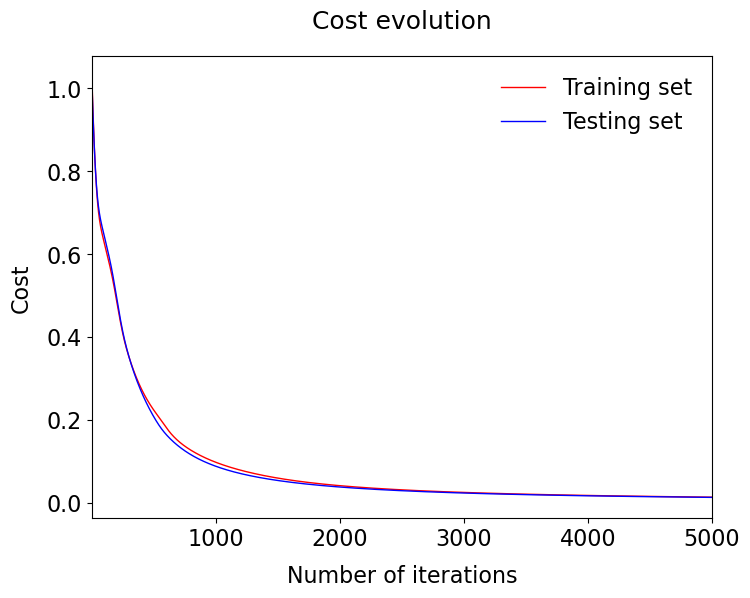

In [119]:
plot_cost_vs_iter(costs_train, costs_test)

# 1.5.2 Scatter Plot

In [120]:
def get_decision_surface(weights, biases, boundary=0.5, range=RANGE, step=STEP):

    # Create a grid of points spanning the parameter space:
    x1v, x2v = np.meshgrid(np.arange(range[0], range[1]+step, step),
                           np.arange(range[0], range[1]+step, step)
    )

    # Stack it so that it is shaped like X_train: (m,2)
    X_grid = np.c_[x1v.ravel(), x2v.ravel()].reshape(-1,2)

    # Feedforward on all grid points and get binary predictions:
    output = feedforward(X_grid, weights, biases)[-1] # getting only output node
    Ypred_grid = predict(output, boundary)

    return (x1v, x2v, Ypred_grid.reshape(x1v.shape))


def plot_scatter(sig, bkg, ds=None, 
                 xname=XNAME, xlabel=XLABEL, 
                 yname=YNAME, ylabel=YLABEL, 
                 range=RANGE, step=STEP, title="Neural Network 2 Hidden Layers"):

    fig, ax = plt.subplots()

    # Decision surface
    if ds:
        (xx, yy, Z) = ds # unpack contour data
        cs = plt.contourf(xx, yy, Z, levels=[0,0.5,1], colors=['orange','dodgerblue'], alpha=0.3)

    # Scatter signal and background:
    ax.scatter(sig[xname], sig[yname], marker='o', s=10, c='dodgerblue', alpha=1, label='Positive class')
    ax.scatter(bkg[xname], bkg[yname], marker='o', s=10, c='orange',     alpha=1, label='Negative class')

    # Axes, legend and plot:
    ax.set_xlim(range); ax.set_xlabel(xlabel)
    ax.set_ylim(range); ax.set_ylabel(ylabel)

    ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", frameon=False) 
    ax.set_title(title)
    plt.show()

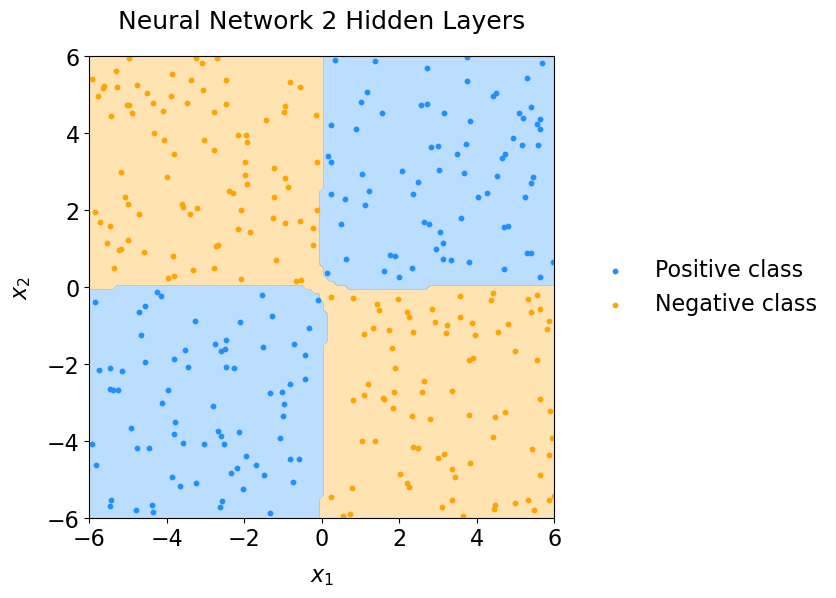

In [121]:
grid = get_decision_surface([W1, W2, W3], [b1, b2, b3])
plot_scatter(sig, bkg, ds=grid)